In [1]:
import scipy.stats as stats
import pandas as pd


In [2]:
combinations = {
    "Older Age + High BP": ["Age", "High_BP"],
    "Smoking + Alcohol + Obesity": ["Smoking_History", "Alcohol_Consumption", "Obese"],
    "High BP + Diabetes + High Cholesterol": ["High_BP", "Diabetes", "High_Cholesterol"],
    "High BP + High Resting BP + Max HR > 150": ["High_BP", "Resting_BP", "Max_Heart_Rate"],
    "Low Sodium + High Creatinine": ["Low_Sodium", "High_Creatinine"],
    "Smoking + High BP + High Cholesterol": ["Smoking_History", "High_BP", "High_Cholesterol"],
    "Diabetes + High Cholesterol + Max HR > 150": ["Diabetes", "High_Cholesterol", "Max_Heart_Rate"],
    "Age > 70 + Low Sodium + ECG Abnormalities": ["Age", "Low_Sodium", "ECG"],
    "Diabetes + Smoking + High Resting BP": ["Diabetes", "Smoking_History", "Resting_BP"],
    "High BP + Max HR > 150 + ECG Issues": ["High_BP", "Max_Heart_Rate", "ECG"],
}


In [3]:
df = pd.read_csv("C:\\Users\\al6436\\Desktop\\Use Case\\heart_failure_prediction.csv")


In [4]:
results = []

for name, features in combinations.items():
    if len(features) > 2:  # Categorical -> Chi-Square Test
        contingency_table = pd.crosstab(df[features[0]], df["Heart_Failure"])
        _, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_used = "Chi-Square Test"
    else:  # Continuous -> T-Test
        group1 = df[df["Heart_Failure"] == 0][features[0]]
        group2 = df[df["Heart_Failure"] == 1][features[0]]
        _, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        test_used = "T-Test"
    
    reject_null = "✅ Reject H₀" if p_value < 0.05 else "❌ Fail to Reject H₀"
    results.append([name, test_used, round(p_value, 5), reject_null])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Combination", "Test Used", "P-Value", "Result"])
print(results_df)


KeyError: 'High_BP'

In [5]:
print(df.columns)


Index(['Age', 'Gender', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol',
       'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate',
       'Exercise_Induced_Angina', 'Oldpeak', 'Slope', 'Num_Major_Vessels',
       'Thalassemia', 'Diabetes', 'Smoking_History', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Family_History', 'BMI', 'Heart_Failure'],
      dtype='object')


In [7]:
results = []

for name, features in combinations.items():
    if len(features) > 2 or df[features[0]].dtype == 'object':  
        # Chi-Square Test for categorical variables
        contingency_table = pd.crosstab(df[features[0]], df["Heart_Failure"])
        _, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_used = "Chi-Square Test"
    else:  
        # T-Test for numerical variables
        group1 = df[df["Heart_Failure"] == 0][features[0]]
        group2 = df[df["Heart_Failure"] == 1][features[0]]
        _, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        test_used = "T-Test"

    # Determine statistical significance
    reject_null = "✅ Reject H₀" if p_value < 0.05 else "❌ Fail to Reject H₀"

    # Append results
    results.append([name, test_used, round(p_value, 5), reject_null])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Combination", "Test Used", "P-Value", "Result"])
print(results_df)

KeyError: 'High_BP'

In [8]:
import pandas as pd
import scipy.stats as stats

# Define high-risk combinations
combinations = {
    "Older Age + High BP": ["Age", "Resting_BP"],
    "Smoking + Alcohol + Obesity": ["Smoking_History", "Alcohol_Consumption", "BMI"],
    "High BP + Diabetes + High Cholesterol": ["Resting_BP", "Diabetes", "Cholesterol"],
    "High BP + High Resting BP + Max HR > 150": ["Resting_BP", "Max_Heart_Rate"],
    "Smoking + High BP + High Cholesterol": ["Smoking_History", "Resting_BP", "Cholesterol"],
    "Diabetes + High Cholesterol + Max HR > 150": ["Diabetes", "Cholesterol", "Max_Heart_Rate"],
    "Age > 70 + ECG Abnormalities": ["Age", "Resting_ECG"],
    "Diabetes + Smoking + High Resting BP": ["Diabetes", "Smoking_History", "Resting_BP"],
    "High BP + Max HR > 150 + ECG Issues": ["Resting_BP", "Max_Heart_Rate", "Resting_ECG"],
}

# List of categorical features
categorical_features = ["Smoking_History", "Alcohol_Consumption", "Diabetes", "Resting_ECG", "Heart_Failure"]

# Store results
results = []

for name, features in combinations.items():
    if all(feature in categorical_features for feature in features):  
        # If all features are categorical → Chi-Square Test
        contingency_table = pd.crosstab(df[features[0]], df["Heart_Failure"])
        _, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_used = "Chi-Square Test"
    
    else:  
        # At least one feature is numerical → Use T-Test
        p_values = []
        for feature in features:
            if feature not in categorical_features:  # Only apply T-Test to numerical features
                group1 = df[df["Heart_Failure"] == 0][feature]
                group2 = df[df["Heart_Failure"] == 1][feature]
                _, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                p_values.append(p_value)

        # Use the worst (highest) p-value among numerical features
        p_value = max(p_values) if p_values else 1.0
        test_used = "T-Test"

    # Determine statistical significance
    reject_null = "✅ Reject H₀" if p_value < 0.05 else "❌ Fail to Reject H₀"

    # Append results
    results.append([name, test_used, round(p_value, 5), reject_null])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Combination", "Test Used", "P-Value", "Result"])
print(results_df)

# Save results
results_df.to_csv("hypothesis_testing_results.csv", index=False)


                                  Combination Test Used  P-Value  \
0                         Older Age + High BP    T-Test  0.60546   
1                 Smoking + Alcohol + Obesity    T-Test  1.00000   
2       High BP + Diabetes + High Cholesterol    T-Test  0.72560   
3    High BP + High Resting BP + Max HR > 150    T-Test  0.98161   
4        Smoking + High BP + High Cholesterol    T-Test  0.72560   
5  Diabetes + High Cholesterol + Max HR > 150    T-Test  0.98161   
6                Age > 70 + ECG Abnormalities    T-Test  0.02595   
7        Diabetes + Smoking + High Resting BP    T-Test  0.60546   
8         High BP + Max HR > 150 + ECG Issues    T-Test  0.98161   

                Result  
0  ❌ Fail to Reject H₀  
1  ❌ Fail to Reject H₀  
2  ❌ Fail to Reject H₀  
3  ❌ Fail to Reject H₀  
4  ❌ Fail to Reject H₀  
5  ❌ Fail to Reject H₀  
6          ✅ Reject H₀  
7  ❌ Fail to Reject H₀  
8  ❌ Fail to Reject H₀  


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:

# Define new high-risk feature combinations
new_combinations = {
    "Obesity + Low Physical Activity + High BP": ["BMI", "Physical_Activity_Level", "Resting_BP"],
    "Age > 60 + Diabetes + High Cholesterol": ["Age", "Diabetes", "Cholesterol"],
    "Smoking + Alcohol + ECG Abnormalities": ["Smoking_History", "Alcohol_Consumption", "Resting_ECG"],
    "Exercise-Induced Angina + High Max HR + High BP": ["Exercise_Induced_Angina", "Max_Heart_Rate", "Resting_BP"],
    "Family History + Diabetes + High Cholesterol": ["Family_History", "Diabetes", "Cholesterol"],
    "Age > 50 + High BMI + High Resting BP": ["Age", "BMI", "Resting_BP"]
}

# List of categorical features
categorical_features = ["Smoking_History", "Alcohol_Consumption", "Diabetes", "Resting_ECG", 
                        "Exercise_Induced_Angina", "Family_History", "Physical_Activity_Level", "Heart_Failure"]

# Store results
new_results = []

for name, features in new_combinations.items():
    if all(feature in categorical_features for feature in features):  
        # If all features are categorical → Chi-Square Test
        contingency_table = pd.crosstab(df[features[0]], df["Heart_Failure"])
        _, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_used = "Chi-Square Test"
    
    else:  
        # At least one feature is numerical → Use T-Test
        p_values = []
        for feature in features:
            if feature not in categorical_features:  # Only apply T-Test to numerical features
                group1 = df[df["Heart_Failure"] == 0][feature]
                group2 = df[df["Heart_Failure"] == 1][feature]
                _, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                p_values.append(p_value)

        # Use the worst (highest) p-value among numerical features
        p_value = max(p_values) if p_values else 1.0
        test_used = "T-Test"

    # Determine statistical significance
    reject_null = "✅ Reject H₀" if p_value < 0.05 else "❌ Fail to Reject H₀"

    # Append results
    new_results.append([name, test_used, round(p_value, 5), reject_null])

# Convert to DataFrame
new_results_df = pd.DataFrame(new_results, columns=["Combination", "Test Used", "P-Value", "Result"])
print(new_results_df)


                                       Combination        Test Used  P-Value  \
0        Obesity + Low Physical Activity + High BP           T-Test  1.00000   
1           Age > 60 + Diabetes + High Cholesterol           T-Test  0.72560   
2            Smoking + Alcohol + ECG Abnormalities  Chi-Square Test  0.90251   
3  Exercise-Induced Angina + High Max HR + High BP           T-Test  0.98161   
4     Family History + Diabetes + High Cholesterol           T-Test  0.72560   
5            Age > 50 + High BMI + High Resting BP           T-Test  1.00000   

                Result  
0  ❌ Fail to Reject H₀  
1  ❌ Fail to Reject H₀  
2  ❌ Fail to Reject H₀  
3  ❌ Fail to Reject H₀  
4  ❌ Fail to Reject H₀  
5  ❌ Fail to Reject H₀  


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


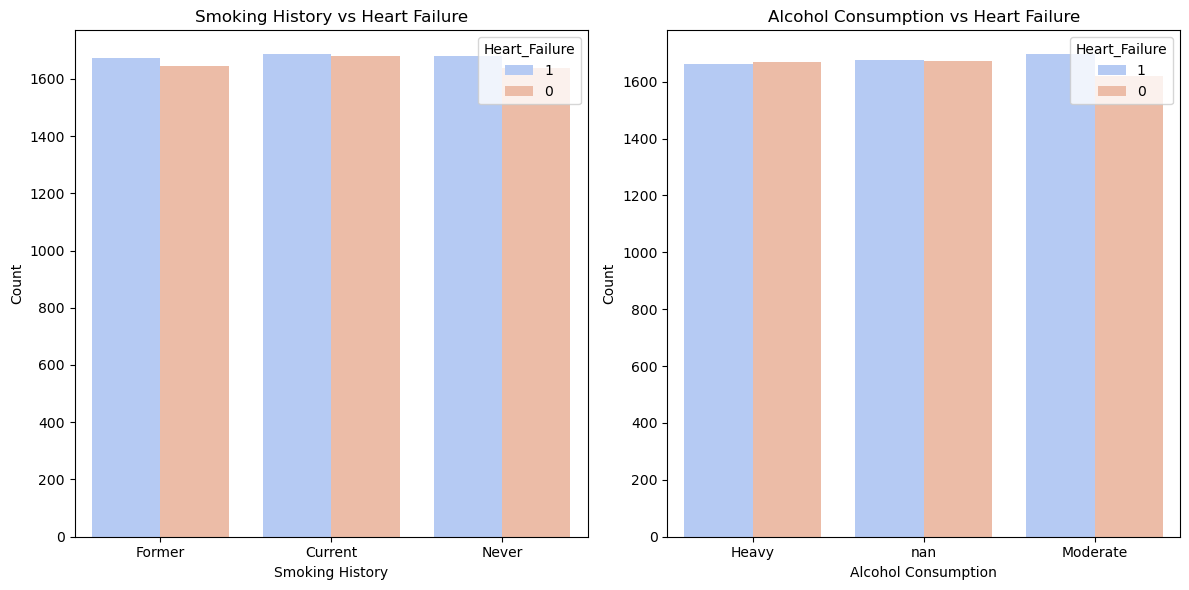

C:\Users\al6436\AppData\Local\Temp\ipykernel_7960\1607572303.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Heart_Failure", y="Age", palette="coolwarm")


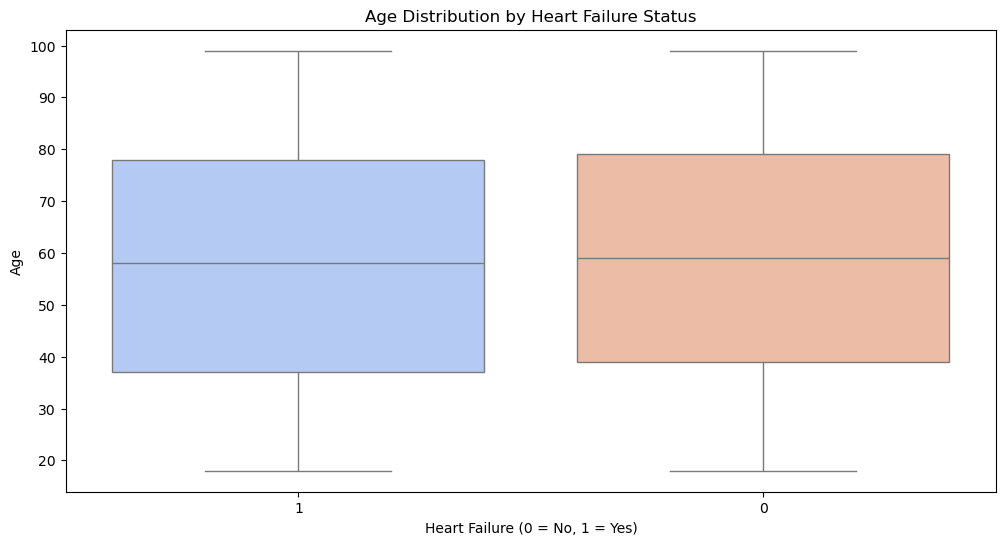

C:\Users\al6436\AppData\Local\Temp\ipykernel_7960\1607572303.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Heart_Failure", y="Max_Heart_Rate", palette="coolwarm")


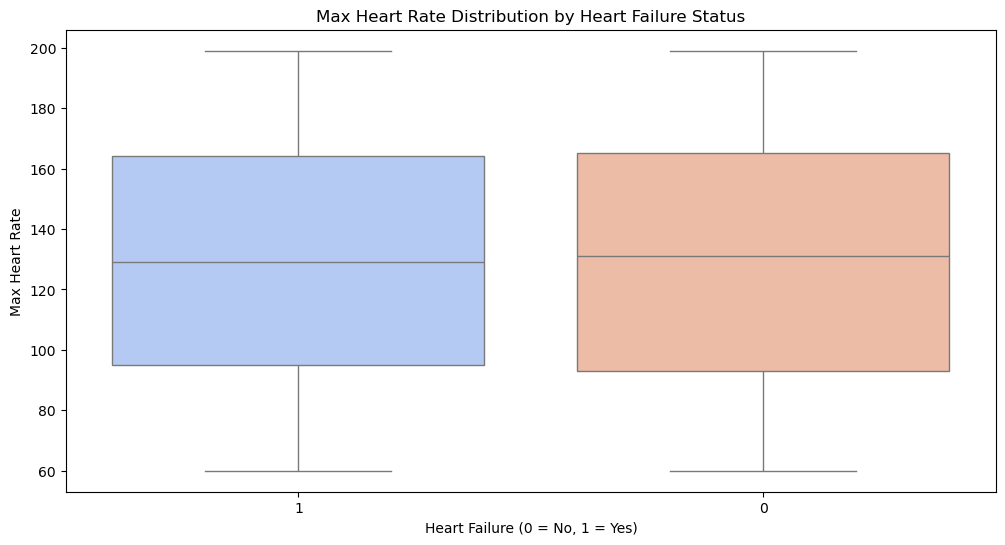

ValueError: could not convert string to float: 'Male'

<Figure size 1400x800 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert categorical features to string type for proper visualization
categorical_features = ["Smoking_History", "Alcohol_Consumption", "Diabetes", "Resting_ECG", 
                        "Exercise_Induced_Angina", "Family_History", "Physical_Activity_Level", "Heart_Failure"]
df[categorical_features] = df[categorical_features].astype(str)

# Set up figure size
plt.figure(figsize=(12, 6))

# 1️⃣ Bar Chart: Categorical Features vs. Heart Failure
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Smoking_History", hue="Heart_Failure", palette="coolwarm")
plt.title("Smoking History vs Heart Failure")
plt.xlabel("Smoking History")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Alcohol_Consumption", hue="Heart_Failure", palette="coolwarm")
plt.title("Alcohol Consumption vs Heart Failure")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 2️⃣ Boxplots: Numerical Features vs. Heart Failure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Heart_Failure", y="Age", palette="coolwarm")
plt.title("Age Distribution by Heart Failure Status")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Heart_Failure", y="Max_Heart_Rate", palette="coolwarm")
plt.title("Max Heart Rate Distribution by Heart Failure Status")
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate")
plt.show()

# 3️⃣ Heatmap: Correlation of All Features
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


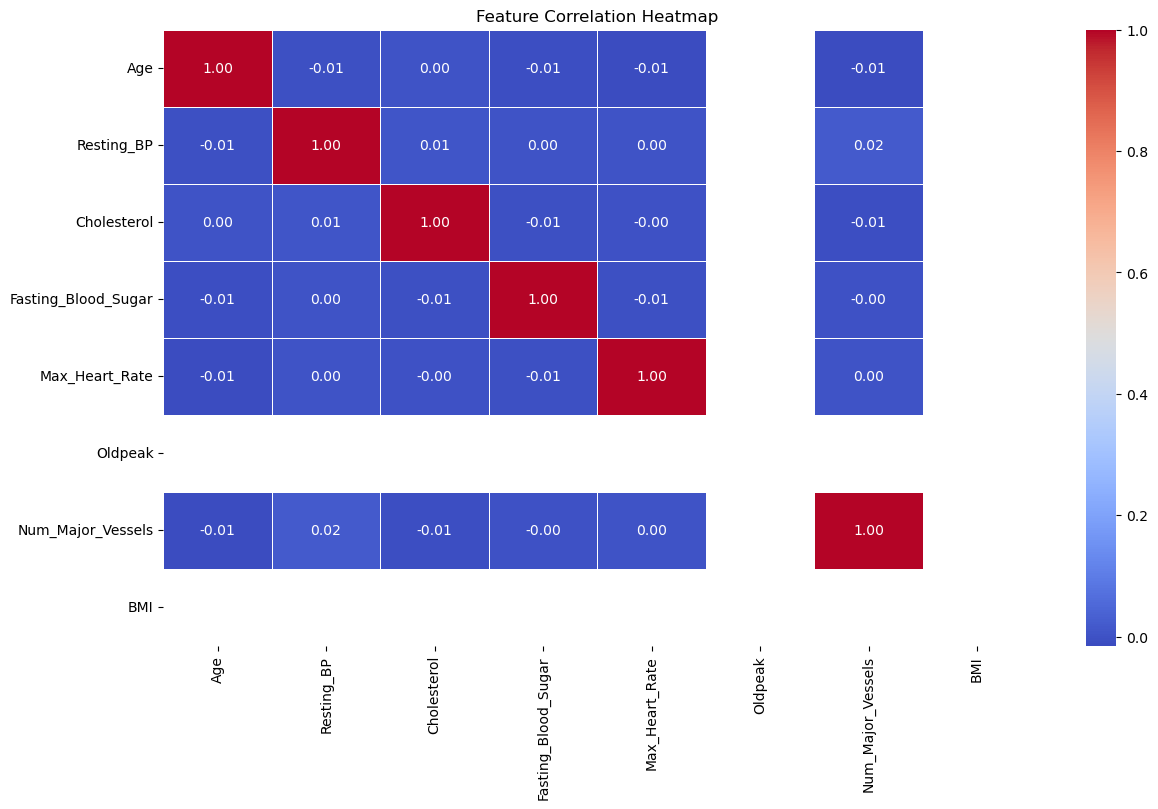

In [12]:
# Convert categorical columns into numerical format or exclude them from correlation
df_numeric = df.select_dtypes(include=["number"])  # Keep only numerical columns

# Heatmap: Correlation of Numerical Features
plt.figure(figsize=(14, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Select only numerical features for ANOVA testing
numerical_features = ["Age", "Resting_BP", "Cholesterol", "Max_Heart_Rate", "Oldpeak", "BMI"]

anova_results = []

# Perform ANOVA for each numerical feature against Heart Failure
for feature in numerical_features:
    group1 = df[df["Heart_Failure"] == 0][feature]
    group2 = df[df["Heart_Failure"] == 1][feature]
    
    # ANOVA test
    f_stat, p_value = stats.f_oneway(group1, group2)
    
    # Determine statistical significance
    significance = "✅ Reject H₀ (Significant)" if p_value < 0.05 else "❌ Fail to Reject H₀ (Not Significant)"
    
    # Store results
    anova_results.append([feature, round(f_stat, 4), round(p_value, 5), significance])

# Convert to DataFrame
anova_results_df = pd.DataFrame(anova_results, columns=["Feature", "F-Statistic", "P-Value", "Result"])

# Display results
print(anova_results_df)


          Feature  F-Statistic  P-Value                                 Result
0             Age          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)
1      Resting_BP          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)
2     Cholesterol          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)
3  Max_Heart_Rate          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)
4         Oldpeak          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)
5             BMI          NaN      NaN  ❌ Fail to Reject H₀ (Not Significant)


C:\Users\al6436\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [14]:
print(df.isnull().sum())  # Shows missing values in each column


Age                        0
Gender                     0
Chest_Pain_Type            0
Resting_BP                 0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Induced_Angina    0
Oldpeak                    0
Slope                      0
Num_Major_Vessels          0
Thalassemia                0
Diabetes                   0
Smoking_History            0
Alcohol_Consumption        0
Physical_Activity_Level    0
Family_History             0
BMI                        0
Heart_Failure              0
dtype: int64


In [15]:
print(df.groupby("Heart_Failure")[["Age", "Resting_BP", "Cholesterol", "Max_Heart_Rate", "Oldpeak", "BMI"]].nunique())


               Age  Resting_BP  Cholesterol  Max_Heart_Rate  Oldpeak  BMI
Heart_Failure                                                            
0               82         120          300             140        1    1
1               82         120          300             140        1    1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a new categorical feature for Age > 50
df["Age_Over_50"] = df["Age"] > 50

# Group by Age > 50 and Family History to get Heart Failure rates
grouped_data = df.groupby(["Age_Over_50", "Family_History"])["Heart_Failure"].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Family_History", y="Heart_Failure", hue="Age_Over_50", data=grouped_data, palette="coolwarm")

# Labels and title
plt.xlabel("Family History of Heart Disease")
plt.ylabel("Proportion of Heart Failure Cases")
plt.title("Impact of Age and Family History on Heart Failure Risk")
plt.legend(title="Age Over 50")

# Show plot
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

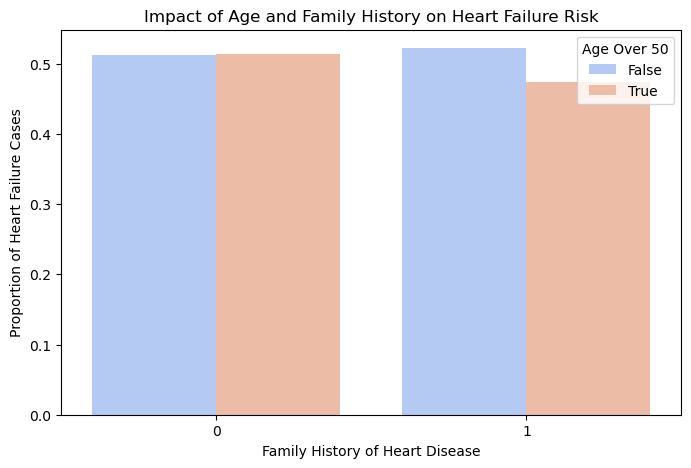

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Ensure "Heart_Failure" is numeric
df["Heart_Failure"] = pd.to_numeric(df["Heart_Failure"], errors="coerce")

# Create a new categorical feature for Age > 50
df["Age_Over_50"] = df["Age"] > 50

# Group by Age > 50 and Family History to get Heart Failure rates
grouped_data = df.groupby(["Age_Over_50", "Family_History"])["Heart_Failure"].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Family_History", y="Heart_Failure", hue="Age_Over_50", data=grouped_data, palette="coolwarm")

# Labels and title
plt.xlabel("Family History of Heart Disease")
plt.ylabel("Proportion of Heart Failure Cases")
plt.title("Impact of Age and Family History on Heart Failure Risk")
plt.legend(title="Age Over 50")

# Show plot
plt.show()


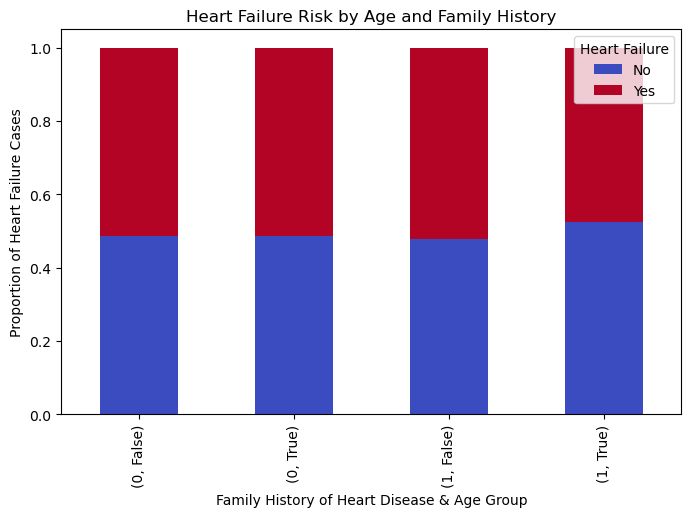

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure "Heart_Failure" is numeric
df["Heart_Failure"] = pd.to_numeric(df["Heart_Failure"], errors="coerce")

# Create categorical feature for Age > 50
df["Age_Over_50"] = df["Age"] > 50

# Count occurrences for each group
grouped_data = df.groupby(["Family_History", "Age_Over_50"])["Heart_Failure"].value_counts(normalize=True).unstack()

# Plot as stacked bar chart
grouped_data.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")

# Labels and title
plt.xlabel("Family History of Heart Disease & Age Group")
plt.ylabel("Proportion of Heart Failure Cases")
plt.title("Heart Failure Risk by Age and Family History")
plt.legend(title="Heart Failure", labels=["No", "Yes"])

# Show plot
plt.show()


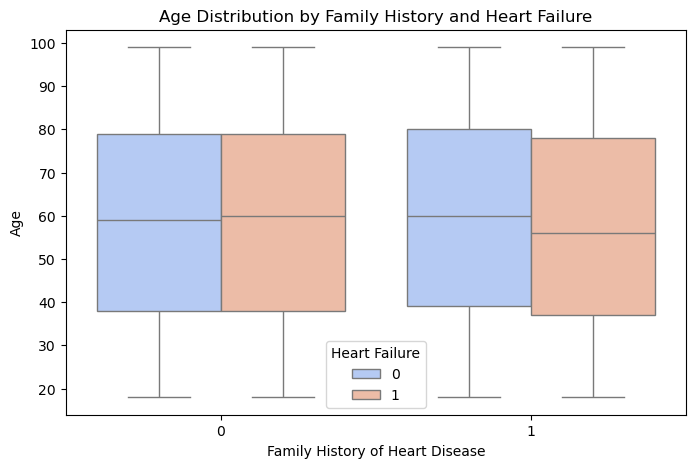

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x="Family_History", y="Age", hue="Heart_Failure", data=df, palette="coolwarm")

plt.xlabel("Family History of Heart Disease")
plt.ylabel("Age")
plt.title("Age Distribution by Family History and Heart Failure")
plt.legend(title="Heart Failure")

plt.show()


C:\Users\al6436\AppData\Local\Temp\ipykernel_7960\1629937538.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_high_risk, x="Heart_Failure", palette="coolwarm")


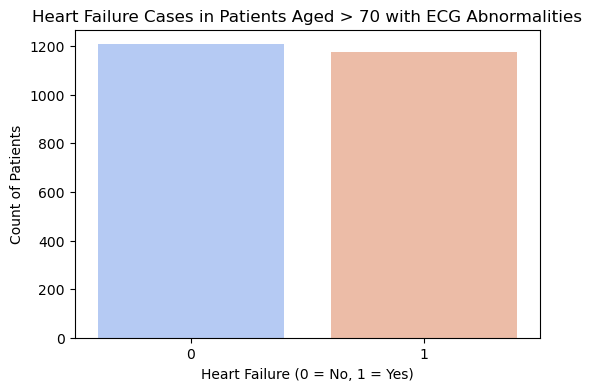

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset for Age > 70 and ECG Abnormalities
df_high_risk = df[(df["Age"] > 70) & (df["Resting_ECG"] != "Normal")]

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_high_risk, x="Heart_Failure", palette="coolwarm")

# Add labels and title
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Patients")
plt.title("Heart Failure Cases in Patients Aged > 70 with ECG Abnormalities")

# Show plot
plt.show()


C:\Users\al6436\AppData\Local\Temp\ipykernel_7960\1714568761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_high_risk, x="Heart_Failure", palette="coolwarm")


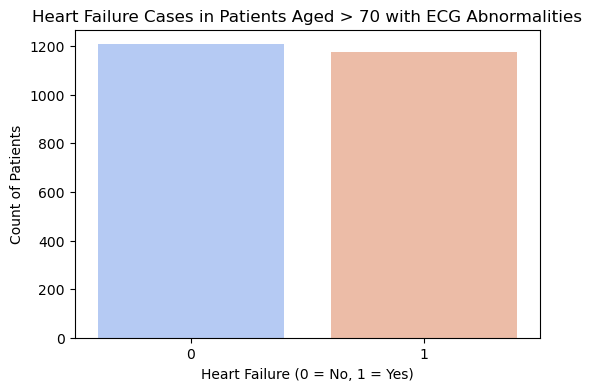

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for Age > 70 and ECG Abnormalities
df_high_risk = df[(df["Age"] > 70) & (df["Resting_ECG"] != "Normal")]

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_high_risk, x="Heart_Failure", palette="coolwarm")

# Labels
plt.xlabel("Heart Failure (0 = No, 1 = Yes)")
plt.ylabel("Count of Patients")
plt.title("Heart Failure Cases in Patients Aged > 70 with ECG Abnormalities")

plt.show()
